In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-dataset/iris.csv


**Problem Statement:****

● **The model should achieve a high level of accuracy in classifying iris species.**

● **The model's predictions should be consistent and reliable, as measured by cross-validation.**

● 
**The final report should provide clear and comprehensive documentation of the project, including allcode, visualizations, and findings.**




**By achieving these objectives, the project will demonstrate the ability to apply machine learning techniques to aclassic classification problem, providing insights into the characteristics of different iris species and theeffectiveness of various algorithms for this task.**


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("/kaggle/input/iris-dataset/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



**The goal is to classify iris flowers into one of three species based on four features: sepal length,sepal width, petal length, and petal width.******


**PERFORMING SOME EXPLORATORY DATA ANALYSIS (EDA)******

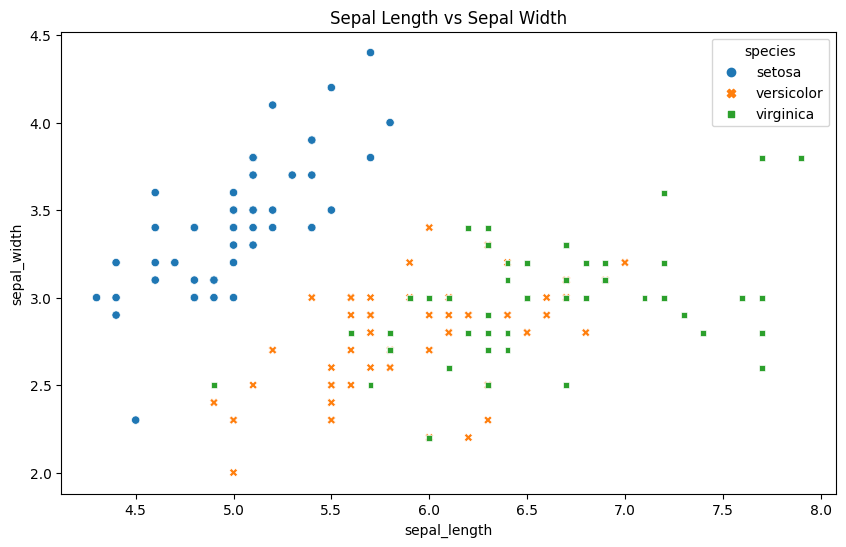

In [8]:
# Scatterplots
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', style='species')
plt.title('Sepal Length vs Sepal Width')
plt.show()

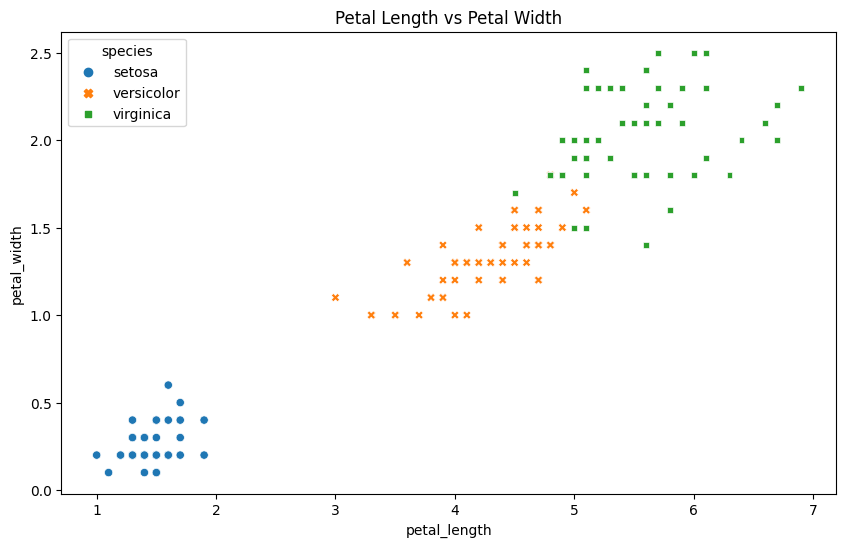

In [9]:
#scatterplots
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', style='species')
plt.title('Petal Length vs Petal Width')
plt.show() 

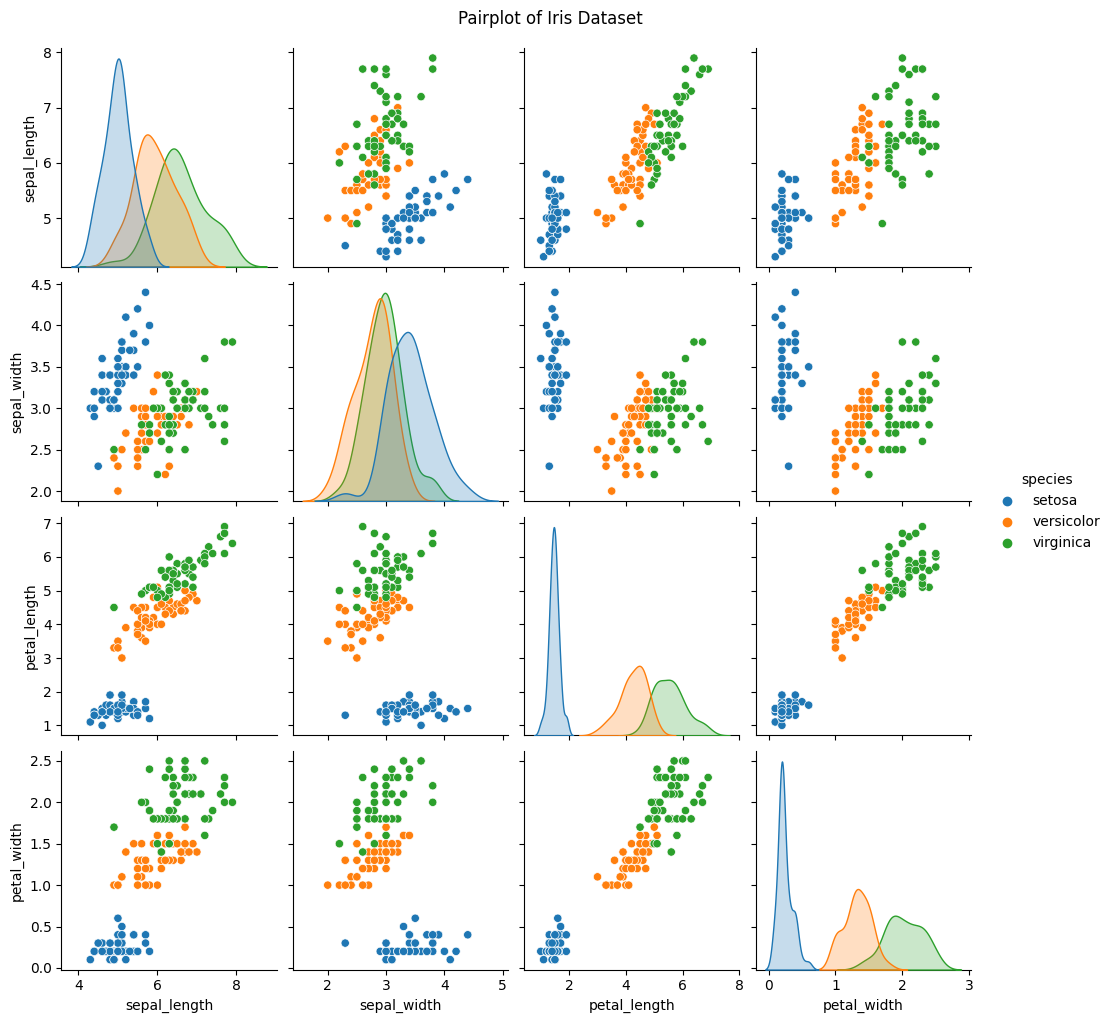

In [11]:
# Pairplots 
sns.pairplot(df, hue='species') 
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()

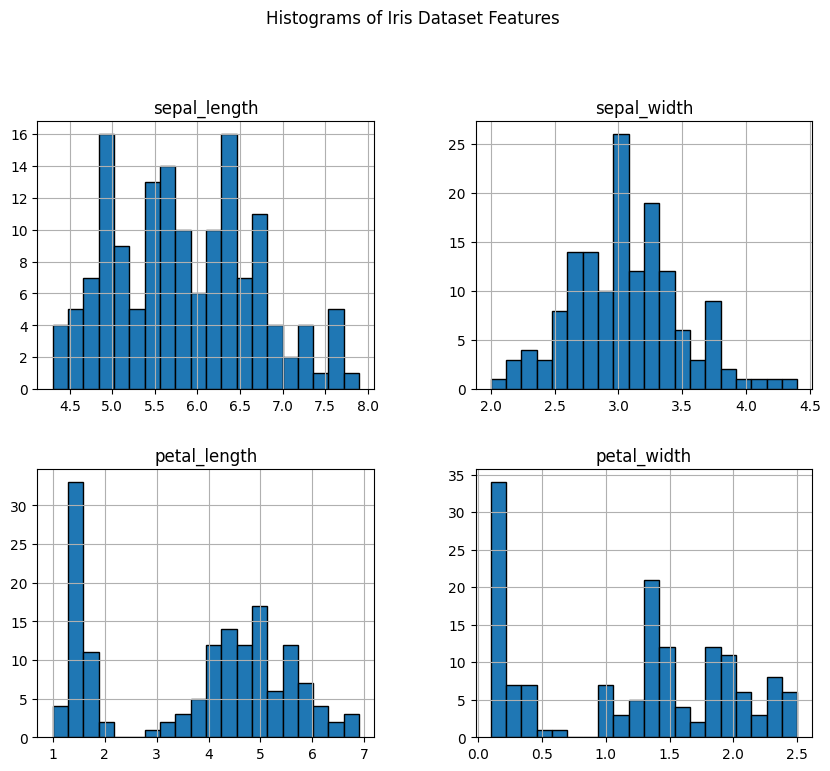

In [10]:
# Histograms 
df.hist(figsize=(10, 8), bins=20, edgecolor='black') 
plt.suptitle('Histograms of Iris Dataset Features', y=1.02)
plt.show()

In [12]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import OrdinalEncoder 
ordinalencoder = OrdinalEncoder(categories=[['setosa', 'versicolor', 'virginica']])
df['species'] = ordinalencoder.fit_transform(df[['species']])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [15]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [17]:
df['species'].value_counts()

species
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

In [21]:
masl = max(df['sepal_length'])
misl = min(df['sepal_length'])
masw = max(df['sepal_width'])
misw = min(df['sepal_width'])
mapw = max(df['petal_width'])
mipw = min(df['petal_width'])
mapl = max(df['petal_length'])
mipl = min(df['petal_length'])


print(f"max sepal length:{masl}")
print(f"min sepal length:{misl}")
print(f"max sepal width:{masw}")
print(f"min sepal width: {misw}")
print(f"max petal length:{mapl}")
print(f"min petal length:{mipl}")
print(f"max petal width:{mapw}")
print(f"max petal width:{mipw}")

max sepal length:7.9
min sepal length:4.3
max sepal width:4.4
min sepal width: 2.0
max petal length:6.9
min petal length:1.0
max petal width:2.5
max petal width:0.1


**THE VALUES ARE NOT ON THE SAME SCALE SO WE HAVE TO USE STANDARD SCALER******

In [22]:
from sklearn.preprocessing import StandardScaler

# Apply feature scaling to 'Age' and 'Salary' columns
scaler = StandardScaler()
df[['sepal_length', 'sepal_width','petal_length','petal_width']] = scaler.fit_transform(df[['sepal_length', 'sepal_width','petal_length','petal_width']])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,0.0
1,-1.143017,-0.124958,-1.341272,-1.312977,0.0
2,-1.385353,0.337848,-1.398138,-1.312977,0.0
3,-1.506521,0.106445,-1.284407,-1.312977,0.0
4,-1.021849,1.263460,-1.341272,-1.312977,0.0


In [23]:
masl = max(df['sepal_length'])
misl = min(df['sepal_length'])
masw = max(df['sepal_width'])
misw = min(df['sepal_width'])
mapw = max(df['petal_width'])
mipw = min(df['petal_width'])
mapl = max(df['petal_length'])
mipl = min(df['petal_length'])


print(f"max sepal length:{masl}")
print(f"min sepal length:{misl}")
print(f"max sepal width:{masw}")
print(f"min sepal width: {misw}")
print(f"max petal length:{mapl}")
print(f"min petal length:{mipl}")
print(f"max petal width:{mapw}")
print(f"max petal width:{mipw}")

max sepal length:2.4920192021244283
min sepal length:-1.870024133847019
max sepal width:3.1146839106774356
min sepal width: -2.438987252491841
max petal length:1.7863413146490472
min petal length:-1.5687352207168408
max petal width:1.7109015831854495
max petal width:-1.4444496972795189


**THE VALUES ARE SCALED IN THE RANGE OF -3 TO +3******

In [24]:
x = df.drop('species',axis=1)
y = df['species']

In [25]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [26]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: species, Length: 150, dtype: float64

****splitting the data into training and testing sets****

In [32]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**BUILDING AND FITTING RANDOM FOREST CLASSIFIER MODEL**

In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

**Define the hyperparameters and their values for Grid Search**

In [30]:
param_grid = { 'n_estimators': [10, 50, 100],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]
             }

In [34]:
# Perform Grid Search with Cross-Validation 
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [35]:
print("Best parameters found by Grid Search:", grid_search.best_params_) 
print("Best cross-validation score:", grid_search.best_score_)

Best parameters found by Grid Search: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10}
Best cross-validation score: 0.9666666666666666


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Predict the test set labels
y_pred = grid_search.predict(x_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy * 100)
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1-score:", f1 * 100)

Accuracy: 100.0
Precision: 100.0
Recall: 100.0
F1-score: 100.0


**Plot the confusion matrix**

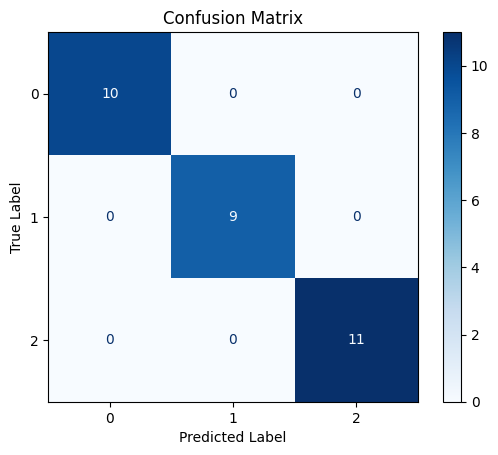

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix) 
disp.plot(cmap='Blues') 
disp.ax_.set_title('Confusion Matrix') 
disp.ax_.set_xlabel('Predicted Label') 
disp.ax_.set_ylabel('True Label') 
plt.show()

 **Feature importance for RandomForestClassifier**

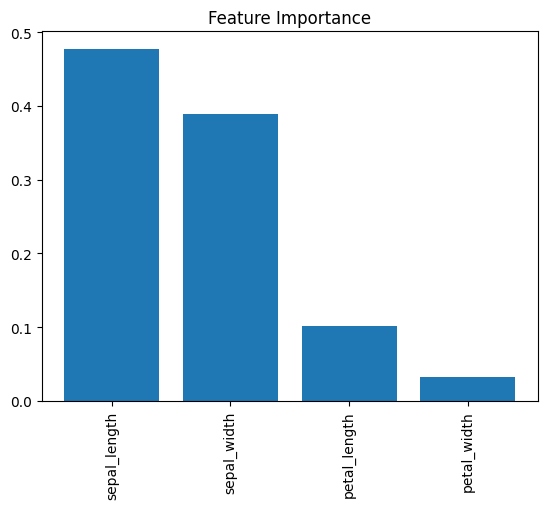

In [47]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure()
plt.title("Feature Importance")
plt.bar(range(x.shape[1]), importances[indices], align="center")
plt.xticks(range(x.shape[1]), df.drop('species',axis=1), rotation=90)
plt.show()